In [1]:
import firedrake
import matplotlib.pyplot as plt
import numpy as np

# Initialize test mesh
Lx_0 = 10
nx = 10
deg = 2

mesh_0 = firedrake.IntervalMesh(nx, Lx_0)
Q_0 = firedrake.FunctionSpace(mesh_0, "CG", deg)

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


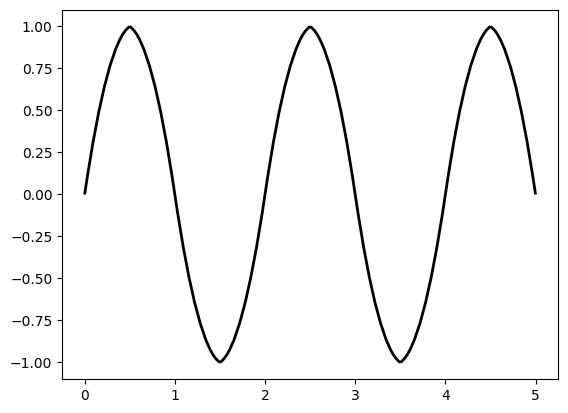

In [6]:
# Define simple function
from firedrake import sin
x_0, = firedrake.SpatialCoordinate(mesh_0)
f_0 = firedrake.interpolate(sin(x_0*3.14159),Q_0);

# Display function
fig, axes = plt.subplots()
firedrake.plot(f_0, axes = axes);

In [3]:
# Define specs of new mesh and function space
Lx_1 = 5
mesh_1 = firedrake.IntervalMesh(nx, Lx_0)
Q_1 = firedrake.FunctionSpace(mesh_1, "CG", deg)

In [ ]:
# Interpolating to a new mesh throws an error
f_1 = firedrake.interpolate(f_0, Q_1)

In [6]:
# Evaluating the function at mesh points throws an error
x_2, = firedrake.SpatialCoordinate(mesh_1)
f_2 = firedrake.interpolate(f_0.at(x_2), Q_1)

ValueError: setting an array element with a sequence.

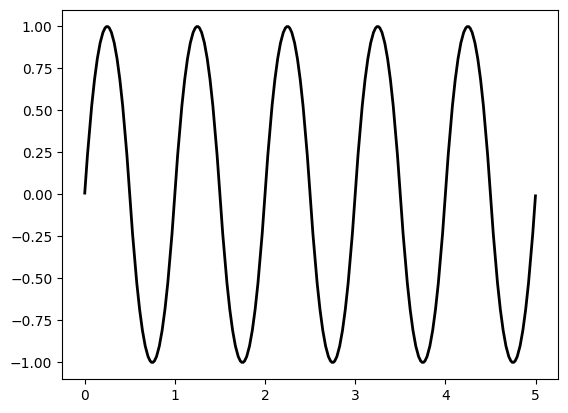

In [4]:
# Directly altering mesh changes coordinates, but squishes function after interpolation
mesh_0.coordinates.dat.data[:] *= Lx_1/Lx_0
f_2 = firedrake.interpolate(f_0, Q_0)

fig, axes = plt.subplots()
firedrake.plot(f_2, axes = axes);